# Pré-processing
## Importations

In [2]:
import cv2
import pandas as pd
import numpy as np
import imgaug.augmenters as iaa
from PIL import Image
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## Préparation des listes de validation et de test

In [26]:
test_data = pd.read_pickle("./data_preprocess/test.pkl")
test_X = np.zeros((len(test_data),150,150,3), dtype=np.float32)
test_Y = np.zeros((len(test_data)), dtype=np.float32)
for index, row in test_data.iterrows():
    img = cv2.imread(str(row['image']))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    test_X[index,:,:,:] = cv2.resize(img, (150,150))
    test_Y[index] = row['label']
np.save('./data_preprocess/array/test_X',test_X)
np.save('./data_preprocess/array/test_Y', test_Y)

In [27]:
val_data = pd.read_pickle("./data_preprocess/val.pkl")
val_X = np.zeros((len(val_data),150,150,3), dtype=np.float32)
val_Y = np.zeros((len(val_data)), dtype=np.float32)
for index, row in val_data.iterrows():
    img = cv2.imread(str(row['image']))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    val_X[index,:,:,:] = cv2.resize(img, (150,150))
    val_Y[index] = row['label']
np.save('./data_preprocess/array/val_X',val_X)
np.save('./data_preprocess/array/val_Y', val_Y)

## Préparation de la liste d'entrainement

In [24]:
train_data = pd.read_pickle("./data_preprocess/train.pkl")
cases_count_train = train_data['label'].value_counts()[0]
final_size = cases_count_train * 2 + len(train_data)

seq = iaa.OneOf([iaa.Fliplr(),iaa.Affine(rotate=20),iaa.Multiply((1.2, 1.5))])

In [28]:
train_X = np.zeros((final_size,150,150,3), dtype=np.float32)
train_Y = np.zeros((final_size), dtype=np.float32)
index_aug = 0
for index, row in train_data.iterrows():
    img = cv2.imread(str(row['image']))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.resize(img, (150,150))
    or_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    or_img = or_img.astype(np.float32)/255.
    train_X[index,:,:,:] = or_img
    train_Y[index] = row['label']
    if row['label'] == 0:
        aug_img1 = seq.augment_image(img)
        aug_img2 = seq.augment_image(img)
        aug_img1 = cv2.cvtColor(aug_img1, cv2.COLOR_BGR2RGB)
        aug_img2 = cv2.cvtColor(aug_img2, cv2.COLOR_BGR2RGB)
        aug_img1 = aug_img1.astype(np.float32)/255.
        aug_img2 = aug_img2.astype(np.float32)/255.
        final_ind_1 = len(train_data) + index_aug
        final_ind_2 = len(train_data) + cases_count_train + index_aug
        train_X[final_ind_1,:,:,:] = aug_img1
        train_Y[final_ind_1] = row['label']
        train_X[final_ind_2,:,:,:] = aug_img2
        train_Y[final_ind_2] = row['label']
        index_aug = index_aug + 1
np.save('./data_preprocess/array/train_X',train_X)
np.save('./data_preprocess/array/train_Y', train_Y)

## Exemple de donnée générée

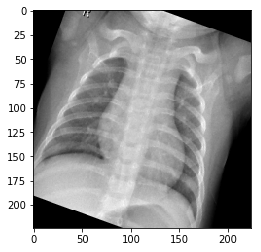

In [19]:
plt.imshow(train_X[7000], interpolation='nearest')

## Distribution des classes après Data-Augmentation

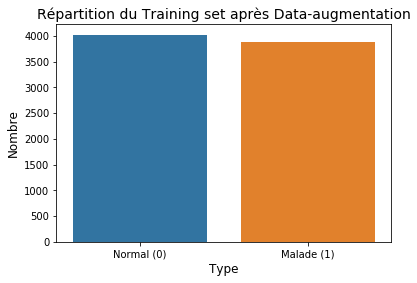

In [20]:
unique, counts = np.unique(train_Y, return_counts=True)
dict(zip(unique, counts))
plt.figure(figsize=(6,4))
sns.barplot(x=unique, y= counts)
plt.title('Répartition du Training set après Data-augmentation', fontsize=14)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Nombre', fontsize=12)
plt.xticks(range(2), ['Normal (0)', 'Malade (1)'])
plt.savefig('./graphs/repart_class_after_dataAug.png')